# COVID19 Dashboard

The following graphs show new cases (by publish date), new tests (by publish date) and new admissions over time.

In [2]:
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [3]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [4]:
# Load JSON files and store the raw data in some variable. Edit as appropriate
with open('caseseries.json', 'rt') as INFILE:
    data=json.load(INFILE)
    
datalist=data['data']

In [5]:
def wrangle_data(data):
    # put raw data into a list
    #datalist=data['data']
    #datalist
    
    # sort data by dates
    dates=[dictionary['date'] for dictionary in datalist]
    dates.sort()
    dates
    
    # convert to pandas
    def parse_date(datestring):
        """Convert a date string into a pandas datetime object """
        return pd.to_datetime(datestring, format="%Y-%m-%d")
    
    # get date range for x-axis
    startdate = parse_date(dates[0])
    enddate = parse_date(dates[-1])
    print(startdate, ' to ', enddate)
    
    # define dataframe
    index=pd.date_range(startdate, enddate, freq='D')
    caseseriesdf=pd.DataFrame(index=index, columns=['cases', 'tests', 'admissions','area'])
    caseseriesdf
    
    # add values to the dataframe
    for entry in datalist:
        date = parse_date(entry['date'])
    
        for column in ['cases', 'tests', 'admissions', 'area']:
        
            if pd.isna(caseseriesdf.loc[date, column]):
                value = (entry[column]) if entry[column]!=None else 0.0
                caseseriesdf.loc[date, column] = value
            
    caseseriesdf.fillna(0.0, inplace=True)
    return caseseriesdf

# putting the wrangling code into a function allows you to call it again after refreshing the data through 
# the API. You should call the function directly on the JSON data when the dashboard starts, by including 
# the call in the cell as below:
caseseriesdf=wrangle_data(data) # df is the dataframe for plotting

2020-01-03 00:00:00  to  2020-11-25 00:00:00


In [6]:
# Place your API access code in this function. Do not call this function directly; it will be called by 
# the button callback. 

def access_api():
    filters = [
        'areaType=nation',  
    ]
    structure = {
        'date': 'date',
        'cases': 'newCasesByPublishDate',
        'tests': 'newTestsByPublishDate',
        'admissions': 'newAdmissions',
        'area': 'areaName'
    }
    
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    return structure # return data read from the API

In [7]:
# Printout from this function will be lost in Voila unless captured in an
# output widget - therefore, we give feedback to the user by changing the 
# appearance of the button
def data_refresh(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """

    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global caseseriesdf
    caseseriesdf=wrangle_data(apidata)
    
    
    refresh_graph()
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton = wdg.Button(
        description = 'Refresh data',
        disabled = False,
        button_style = '',
        tooltip = 'Click to refresh the PHE data',
        icon = 'server'
    )

# remember to register your button callback function with the button
apibutton.on_click(data_refresh) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(description='Refresh data', icon='server', style=ButtonStyle(), tooltip='Click to refresh the PHE data'…

2020-01-03 00:00:00  to  2020-11-25 00:00:00


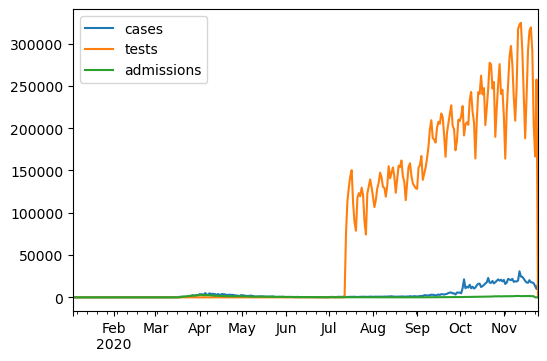

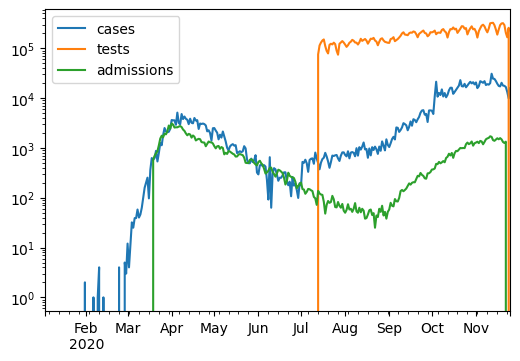

Output()

In [8]:
caseseriesdf.plot()
caseseriesdf.plot(logy=True)

series = wdg.SelectMultiple(
    options=['cases', 'tests', 'admissions'],
    value=['cases', 'tests', 'admissions'],
    rows=3,
    description='Stats: ',
    disabled=False
)

scale = wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)
controls=wdg.HBox([series, scale])
        
def plot_caseseries(gcols, gscale):

    
    
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        caseseriesdf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    

def refresh_graph():
    """ We change the value of the widget in order to force a redraw of the graph;
    this is useful when the data have been updated. This is a bit of a gimmick; it
    needs to be customised for one of your widgets. """
    current=series.value
    if current==series.options[0]:
        other=series.options[1][2]
    elif current==series.options[1]:
        other=series.options[0][2]
    else:
        other=series.options[0][1]
    #series.value=other # forces the redraw
    #series.value=current # now we can change it back
    
    
graph=wdg.interactive_output(plot_caseseries, {'gcols': series, 'gscale': scale})
    
display(controls, graph)

# Deploying the dashboard

Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

**Author and Copyright Notice** (C) Jennifer Nlewedum, 2020. 
Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*